# Большой проверочный проект по обработке и визуализации данных

## Обзор

Вы планируете посмотреть какой-то фильм. Можете ли Вы доверять онлайн-рейтингам и отзывам о фильмах? *Особенно* если та компания, которая занимается рейтингами и отзывами, *также* зарабатывает на продаже билетов на фильмы. Есть ли у таких компаний тенденция выдавать завышенные или заниженные рейтинги?

### Цель проекта:

**Цель проекта - выполнить шаги по мотивам статьи на сайте fivethirtyeight.com о рейтингах и посмотреть, сможем ли мы прийти к тем же выводам, которые приведены в статье. Вы будете применять Ваши навыки работы с pandas и навыки визуализации данных для того, чтобы определить, предоставляла ли компания Fandango завышенные рейтинги в 2015 году для того, чтобы продавать больше билетов.**


----


### Данные

Исходные данные для статьи [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) находятся в свободном доступе по следующей ссылке на github: https://github.com/fivethirtyeight/data. Это два csv-файла. В одном файле данные о рейтингах от компании Fandango, а в другом файле агрегированные данные о рейтингах от других компаний, таких как Metacritic, IMDB и Rotten Tomatoes.

#### all_sites_scores.csv

-----

Файл `all_sites_scores.csv` содержит все фильмы, для которых есть рейтинг Rotten Tomatoes, рейтинг RT User, оценка Metacritic, оценка Metacritic User и оценка IMDb, а также как минимум 30 отзывов от фанатов на Fandango. Данные Fandango были выгружены 24 августа 2015.

Колонка | Определение
--- | -----------
FILM | Название фильма
RottenTomatoes | Оценка "Rotten Tomatoes Tomatometer" для этого фильма
RottenTomatoes_User | Оценка "Rotten Tomatoes user" для этого фильма
Metacritic | Оценка "Metacritic" для этого фильма
Metacritic_User | Оценка "Metacritic user" для этого фильма
IMDB | Оценка "IMDb user" для этого фильма
Metacritic_user_vote_count | Количество голосов за этот фильм от пользователей Metacritic
IMDB_user_vote_count | Количество голосов за этот фильм от пользователей IMDb

----
----

#### fandango_scape.csv

Фильм `fandango_scrape.csv` содержит данные о фильмах, которые авторы статьи выгрузили с Fandango.

Колонка | Определение
--- | ---------
FILM | Название фильма
STARS | Количество звёзд на Fandango.com
RATING |  Рейтинг Fandango - значение, прочитанное с HTML-страницы. Это средний рейтинг фильма.
VOTES | Количество голосов пользователей, которые написали отзыв о фильме (на момент выгрузки данных).

----

Импортируем библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Часть 2: Сравниваем рейтинги Fandango и другие пользовательские рейтинги

Сначала давайте изучим рейтинги Fandango и посмотрим, совпадут ли результаты нашего анализа с выводами в статье.

Выполним ячейку ниже для загрузки файла fandango_scrape.csv**

In [22]:
fandango = pd.read_csv("fandango_scrape.csv")

**Изучим свойства полученного объекта DataFrame - выведем несколько первых строк, а также общую информацию.**

In [23]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [15]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Давайте изучим связь между популярностью фильма и его рейтингом. Нарисуйте график scatterplot, показывающий связь между колонками RATING и VOTES. Можете поменять стилизацию графика по Вашему вкусу.**

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

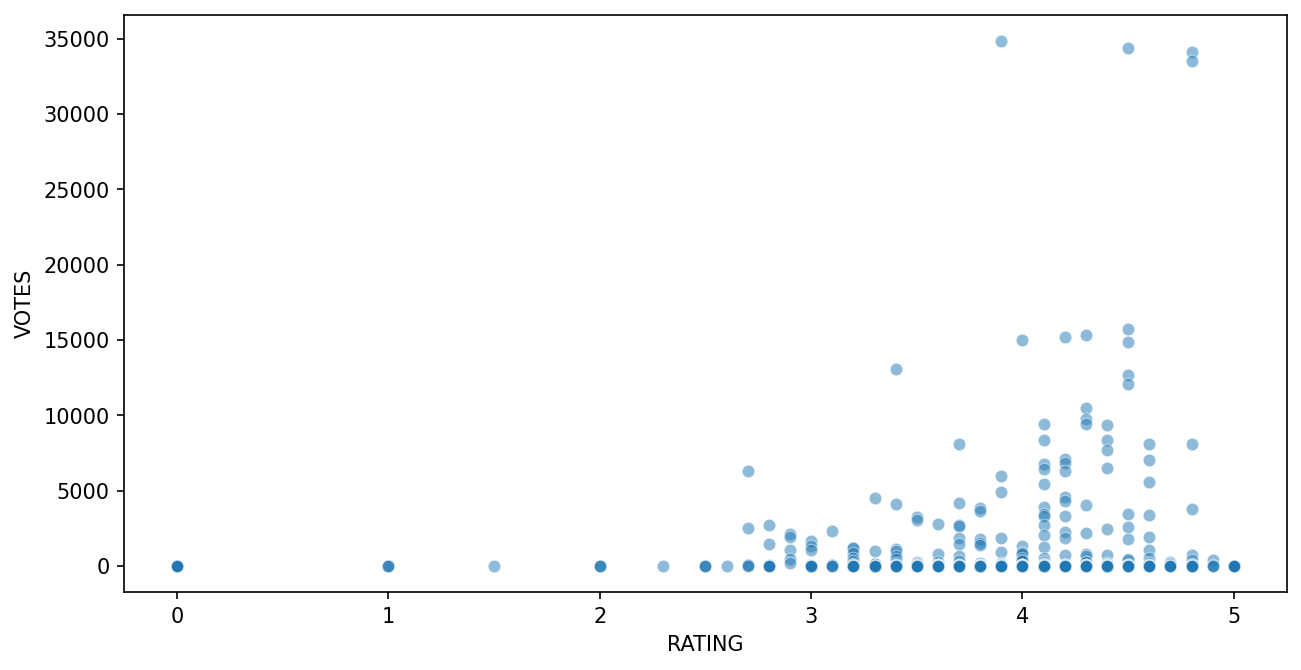

In [16]:
plt.figure(figsize=(10,5), dpi=150)
sns.scatterplot(x=fandango['RATING'], y=fandango['VOTES'], data=fandango, alpha=0.5)

**Вычислим корреляцию между колонками:**

In [17]:
corr_matrix = fandango.drop('FILM',axis=1).corr()
corr_matrix

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Сделаем предположение, что каждая строка в колонке FILM содержит значение в следующем формате:**

    Название Фильма (Год)
    
**Создим новую колонку, в ней возьмите из строки FILM только год, и назовите эту новую колонку YEAR**

In [40]:
fandango['YEAR'] = fandango['FILM'].apply(lambda film: film.split('(')[1][:-1])
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [43]:
#Удаляем ненужные данные
fandango['YEAR'] = fandango['YEAR'].drop(fandango[fandango['YEAR'] == 'Stratford Festival)'].index)
fandango['YEAR'] = fandango['YEAR'].drop(fandango[fandango['YEAR'] == 'Shi Gu)'].index)
fandango['YEAR'] = fandango['YEAR'].drop(fandango[fandango['YEAR'] == '2014)'].index)

**Содеражание фильмов в наборе данных Fandango, в разбивке по годам**

In [45]:
fandango['YEAR'].value_counts()


2015    474
2014     23
1964      1
2016      1
2012      1
Name: YEAR, dtype: int64

**Визуализируем количество фильмов в год с помощью графика:**

<AxesSubplot:xlabel='YEAR', ylabel='count'>

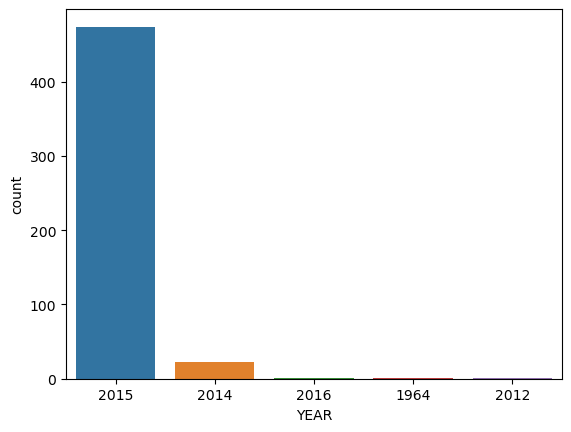

In [46]:
sns.countplot(data=fandango, x=fandango['YEAR'])

**Какие 10 фильмов получили наибольшее количество голосов (votes)?**

In [50]:
fandango.sort_values(by='VOTES', ascending=False)[:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**Сколько фильмов имеет нулевое количество голосов (votes)?**

In [69]:
fandango[fandango['VOTES'] == 0].count()[0]

69

**Создадим DataFrame только с теми фильмами, которые имеют голоса (votes) - то есть, удалите те фильмы, у которых нет ни одного голоса.**

In [70]:
only_voted_movies = fandango.drop(fandango[fandango['VOTES'] == 0].index) 

In [74]:
only_voted_movies.info()
#fandango.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    435 non-null    object 
 1   STARS   435 non-null    float64
 2   RATING  435 non-null    float64
 3   VOTES   435 non-null    int64  
 4   YEAR    431 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 20.4+ KB


----

**Из-за особенностей отображения рейтингов в виде звёзд на страницах HTML, истинные рейтинги пользователей могут немного отличаться от рейтингов, которые показываются пользователю. Давайте визуализируем эту разницу распределений.**

**Создадим график KDE plot (или несколько таких графиков), который отображает распределение отображаемых рейтингов (STARS) и истинных рейтингов на основе голосов пользователей (RATING). Обрежьте диапазон KDE в пределах 0-5.**

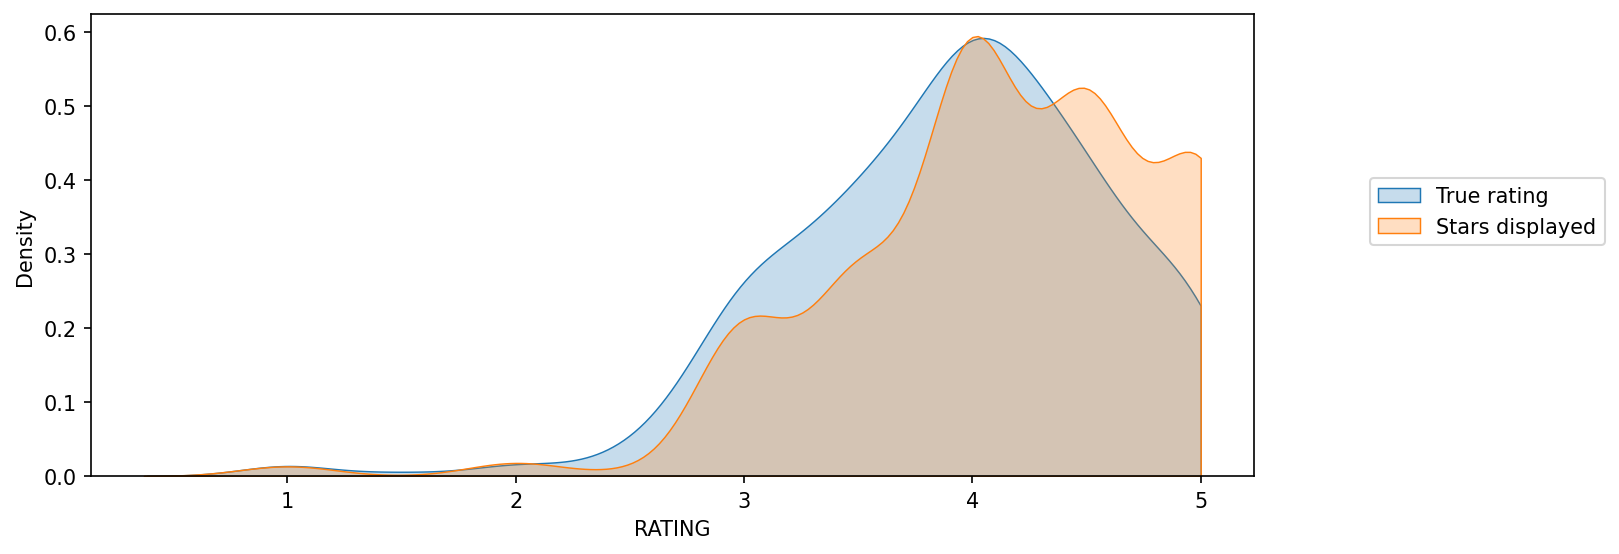

In [92]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=only_voted_movies,  x='RATING', clip=(0,5), lw=0.7, shade=True, label='True rating')
sns.kdeplot(data=only_voted_movies, x='STARS', clip=(0,5), lw=0.7, shade=True, label='Stars displayed')
plt.legend(loc=(1.1,0.5))

**Теперь давайте посчитаем эту разницу в численном виде; Создадим новую колонку, в которой сохраните разницу между колонками STARS и RATING с помощью обычного вычитания STARS-RATING, а также выполним округление до одной десятичной цифры после запятой.**

In [96]:
only_voted_movies['STARS_DIFF'] = abs(only_voted_movies['STARS'] - only_voted_movies['RATING']).round(1)

In [97]:
only_voted_movies

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**Нарисуем график count plot для отображения того, сколько раз встречается то или иное значение разницы между STAR и RATING:**

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

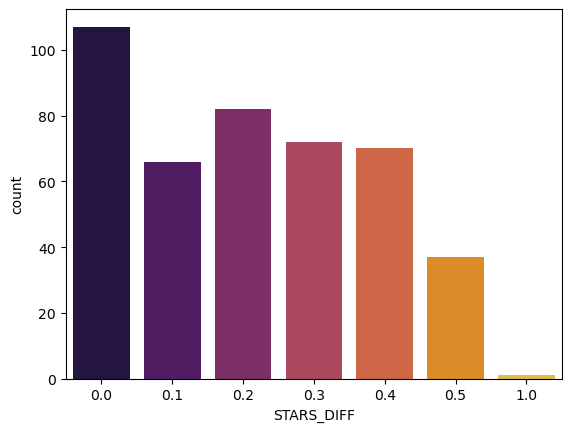

In [100]:
sns.countplot(data=only_voted_movies, x=only_voted_movies['STARS_DIFF'],palette='inferno')

**На этом графике мы видим, что один из фильмов имеет разницу в 1 звезду между отображаемым рейтингом и истинным рейтингом! Найдем этот фильм.**

In [102]:
only_voted_movies[only_voted_movies['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Часть 3: Сравнение рейтингов Fandango с рейтингами других компаний

Давайте посмотрим, как рейтинги Fandango соотносятся с рейтингами других компаний.

**Выполнии ячейку ниже, чтобы загрузить файл "all_sites_scores.csv"**

In [103]:
all_sites = pd.read_csv("all_sites_scores.csv")

**Изучим общие свойства полученного объекта DataFrame.**

In [104]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [105]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [106]:
all_sites.corr()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
RottenTomatoes,1.000000,0.781440,0.957360,0.754296,0.779671,0.111325,0.107083
RottenTomatoes_User,0.781440,1.000000,0.690998,0.687132,0.895297,0.198320,0.221776
Metacritic,0.957360,0.690998,1.000000,0.723459,0.727298,0.138184,0.114507
Metacritic_User,0.754296,0.687132,0.723459,1.000000,0.756265,0.121478,0.112580
IMDB,0.779671,0.895297,0.727298,0.756265,1.000000,0.205573,0.230058
Metacritic_user_vote_count,0.111325,0.198320,0.138184,0.121478,0.205573,1.000000,0.880635
IMDB_user_vote_count,0.107083,0.221776,0.114507,0.112580,0.230058,0.880635,1.000000


### Рейтинги от Rotten Tomatoes

Начнём с рейтингов Rotten Tomatoes. Здесь два набора рейтингов - рейтинги, опубликованные официальными критиками, и пользовательские рейтинги. 

**Нарисуем график scatterplot, изображающий для Rotten Tomatoes связь между рейтингами от критиков и пользовательскими рейтингами.**

(0.0, 100.0)

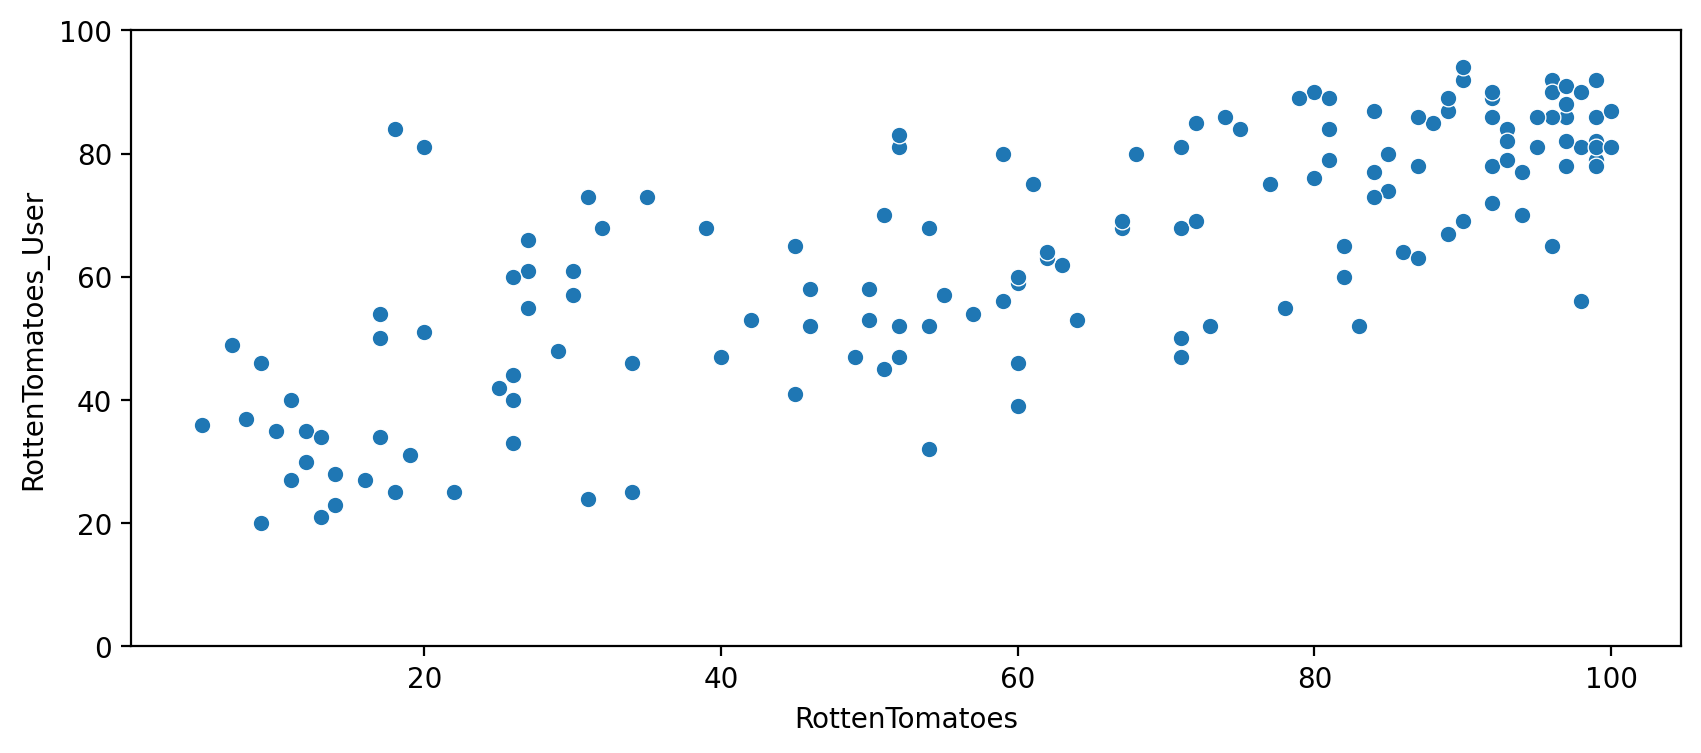

In [112]:
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=all_sites, x=all_sites.RottenTomatoes, y=all_sites.RottenTomatoes_User)
plt.ylim(0,100)

Давайте изучим численную разницу между этими двумя рейтингами. Мы посчитаем эту разницу с помощью формулы RottenTomatoes-RottenTomatoes_User. Полученные значения Rotten_Diff - это рейтинг критиков минус рейтинг пользователей. Близкие к нулю значения говорят о том, что критики и пользователи согласны друг с другом. Большие положительные значения - когда критики оценили фильм намного выше, чем пользователи. А большие отрицательные значения - наоборот, пользователи оценили фильм намного выше, чем критики.

**Создадим новую колонку, в которой сохраним разницу между рейтингом от критиков и пользовательским рейтингом для Rotten Tomatoes. Используем формулу RottenTomatoes-RottenTomatoes_User.**

In [113]:
all_sites['Rotten_Diff'] = all_sites.RottenTomatoes - all_sites.RottenTomatoes_User

In [114]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


Теперь давайте посчитаем среднее значение полученной разницы по всему набору данных. Поскольку разница может быть как положительной, так и отрицательной, то давайте сначала возьмём абсолютные величины всех значений, и только после этого посчитаем среднее значение. Таким образом мы получим среднее значение абсолютной разницы между рейтингами от критиков и пользовательскими рейтингами.

**Вычислим среднюю абсолютную разницу между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes, согласно описанию выше.**

In [115]:
abs(all_sites.Rotten_Diff).mean()

15.095890410958905

**Нарисуем график распределения разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes. На этом графике будут отрицательные значения. Для отображения этого распределения будем использовать как KDE, так и гистограммы.**

<Figure size 3000x1000 with 0 Axes>

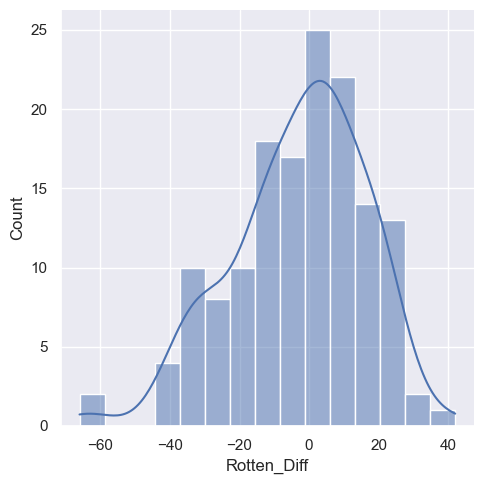

In [134]:
plt.figure(figsize=(15,5), dpi=200)
#sns.set_theme(rc={'figure.figsize': (15, 6)})
sns.displot(data=all_sites, x=all_sites.Rotten_Diff, kde=True, bins=15)

**Далее нарисуйте график распределения *абсолютных значений* разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes.**

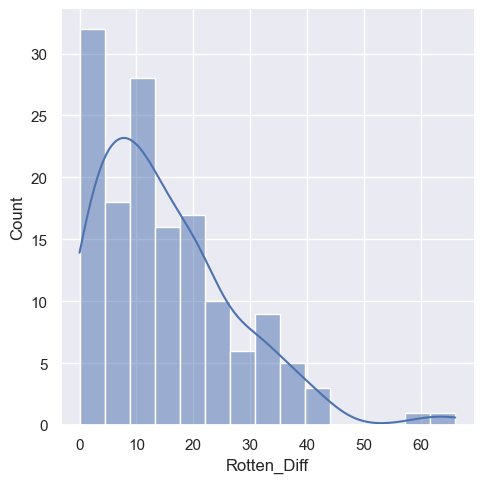

In [135]:
sns.displot(data=all_sites, x=abs(all_sites.Rotten_Diff), kde=True, bins=15)

**Давайте выясним, какие фильмы наиболее отличаются по рейтингам. Сначала выведите 5 фильмов с наибольшей по модулю *отрицательной* разницей рейтингов. Поскольку мы вычисляли разницу рейтингов по формуле Critics Rating - Users Rating, большие по модулю отрицательные значения говорят о том, что пользователи в среднем оценили эти фильмы намного выше, чем критики.**

**Какие 5 фильмов в среднем были выше всего оценены пользователями, по сравнению с оценками от критиков:**

In [144]:
all_sites[['FILM', 'Rotten_Diff']].sort_values(by=['Rotten_Diff','FILM'])[:5]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**Далее наоборот - отобразите 5 фильмов, которые в среднем были выше всего оценены критиками, по сравнению с оценками от пользователей.**

In [152]:
all_sites[['FILM', 'Rotten_Diff']].sort_values(by=['Rotten_Diff','FILM'], ascending=[False,False])[:5]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
115,While We're Young (2015),31
112,It Follows (2015),31
37,Welcome to Me (2015),24
145,"Kumiko, The Treasure Hunter (2015)",24


## Рейтинги от MetaCritic

Далее давайте быстро взглянем на рейтинги от MetaCritic. Они тоже отображают два типа рейтингов - как свои официальные рейтинги, так и пользовательские рейтинги.

**Нарисуем график scatterplot для сравнения рейтингов Metacritic и Metacritic User.**

<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

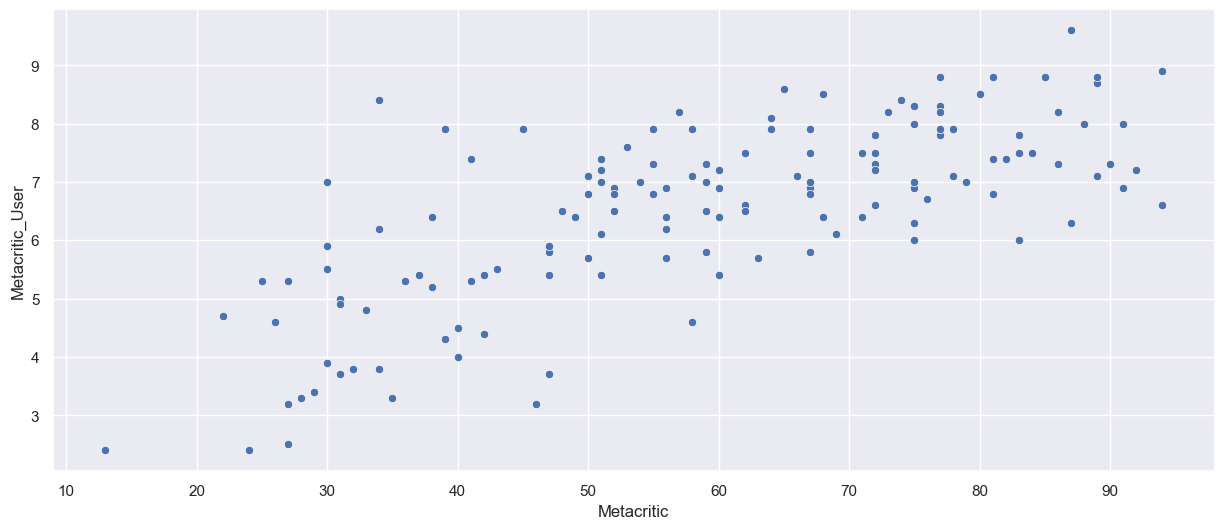

In [153]:
sns.scatterplot(data=all_sites, x=all_sites.Metacritic, y=all_sites.Metacritic_User)

## Рейтинги от IMDB

И наконец, посмотрим на рейтинги от IMDB. Обратите внимание, что Metacritic и IMDB показывают количество голосов. Посмотрим на наиболее популярные фильмы.

**Нарисуем график scatterplot для изображения связи между количеством голосов на MetaCritic и количеством голосов на IMDB.**

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

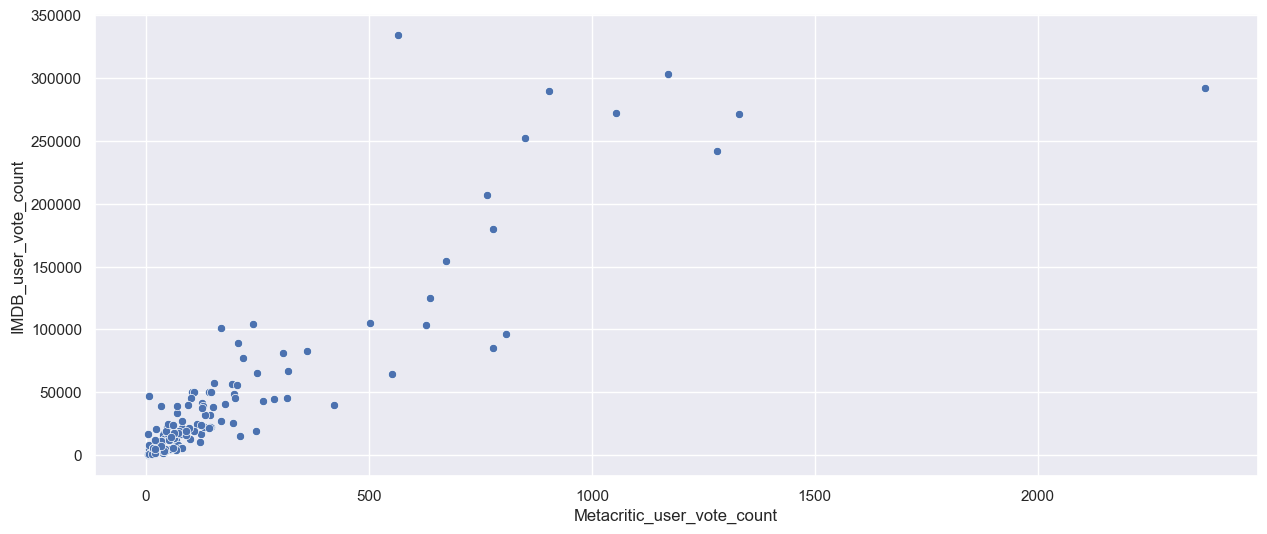

In [154]:
# НАПИШИТЕ ВАШ КОД В ЭТОЙ ЯЧЕЙКЕ!
sns.scatterplot(data=all_sites, x=all_sites.Metacritic_user_vote_count, y=all_sites.IMDB_user_vote_count)

**Здесь мы видим два "выброса" - точки, очень сильно отличающиеся от всех других точек. Один фильм получил наибольшее количество голосов на IMDB, но только 500 голосов на Metacritic. Что это за фильм?**

**Какой фильм получил наибольшее количество голосов на IMDB?**

In [158]:
all_sites[all_sites.IMDB_user_vote_count == all_sites.IMDB_user_vote_count.max() ]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**Какой фильм получил наибольшее количество голосов на Metacritic?**

In [159]:
all_sites[all_sites.Metacritic_user_vote_count == all_sites.Metacritic_user_vote_count.max() ]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Сравнение рейтингов Fandango с рейтингами других компаний

Давайте наконец выясним, являлись ли рейтинги Fandango искусственно завышенными, чтобы продавать больше билетов.

**Объединим таблицу fandango с таблицей all_sites. Не каждый фильм в таблице Fandango найдётся в таблице all_sites, потому что некоторые фильмы Fandango имеют очень мало отзывов или вообще не имеют отзывов. Но мы хотим сравнивать только те фильмы, которые есть в обеих таблицах. Поэтому сделаем объединение "*inner* merge" двух наборов данных, сопоставляя строки по колонке FILM.**

In [182]:
united_table = fandango.merge(all_sites, on='FILM', how='inner')

In [183]:
united_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [184]:
united_table.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


### Нормализация колонок до диапазона 0-5 в соответствии с колонками STARS и RATINGS от Fandango

Обратим внимание, что компании Rotten Tomatoes, Metacritic и IMDB используют другую шкалу измерения рейтингов, чем шкала от 0 до 5 звезд в Fandango. Чтобы выполнить сравнения, нам нужно *нормализовать* эти значения, чтобы они попадали с диапазон от 0 до 5 звёзд.

**Добавим дополнительные колонки в all_sites, и запишите в них нормализованные значения рейтингов от 0 до 5. Это можно сделать разными способами.**



Можно рассмотреть такой простой способ конвертации рейтингов:
* 100/20 = 5 
* 10/2 = 5

In [185]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,5))
united_table['RT_Norm'] = min_max_scaler.fit_transform(united_table['RottenTomatoes'].values.reshape(-1,1)).round(1)
united_table['RTU_Norm'] = min_max_scaler.fit_transform(united_table['RottenTomatoes_User'].values.reshape(-1,1)).round(1)
united_table['Meta_Norm'] = min_max_scaler.fit_transform(united_table['Metacritic'].values.reshape(-1,1)).round(1)
united_table['Meta_U_Norm'] = min_max_scaler.fit_transform(united_table['Metacritic_User'].values.reshape(-1,1)).round(1)
united_table['IMDB_Norm'] = min_max_scaler.fit_transform(united_table['IMDB'].values.reshape(-1,1)).round(1)

In [186]:
united_table

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.1,1.5,2.0,0.6,0.2
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.5,4.1,2.8,3.2,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.5,4.4,3.6,2.9,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.3,3.3,3.1,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.7,5.0,4.5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24,4.3,2.9,3.4,2.8,2.9
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14,4.7,4.1,4.6,2.7,3.3
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9,4.6,4.3,3.3,3.2,4.1
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9,4.7,4.5,4.5,3.4,3.7


**Далее создадим DataFrame с названием norm_scores, в котором оставим только нормализованные рейтинги. Также оставим колонки STARS и RATING из исходной таблицы fandango.**

In [187]:
norm_scores = united_table[['STARS','RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]


In [188]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.1,1.5,2.0,0.6,0.2
1,4.5,4.5,3.5,4.1,2.8,3.2,3.6
2,5.0,4.8,3.5,4.4,3.6,2.9,3.7
3,5.0,4.8,4.0,4.3,3.3,3.1,3.7
4,4.5,4.5,4.9,4.7,5.0,4.5,5.0


### Сравнение распределений рейтингов от разных компаний


А теперь момент истины! Действильно ли Fandango показывал неоправданно высокие рейтинги? Мы уже знаем, что отображаемые значения RATING были выше значений STARS. Но являются ли сами рейтинги в среднем более высокими, чем у других компаний?


**Нарисуем график, сравнивающий распределения нормализованных рейтингов от всех компаний. Это можно сделать разными способами, но попробуем использовать Seaborn KDEplot.**


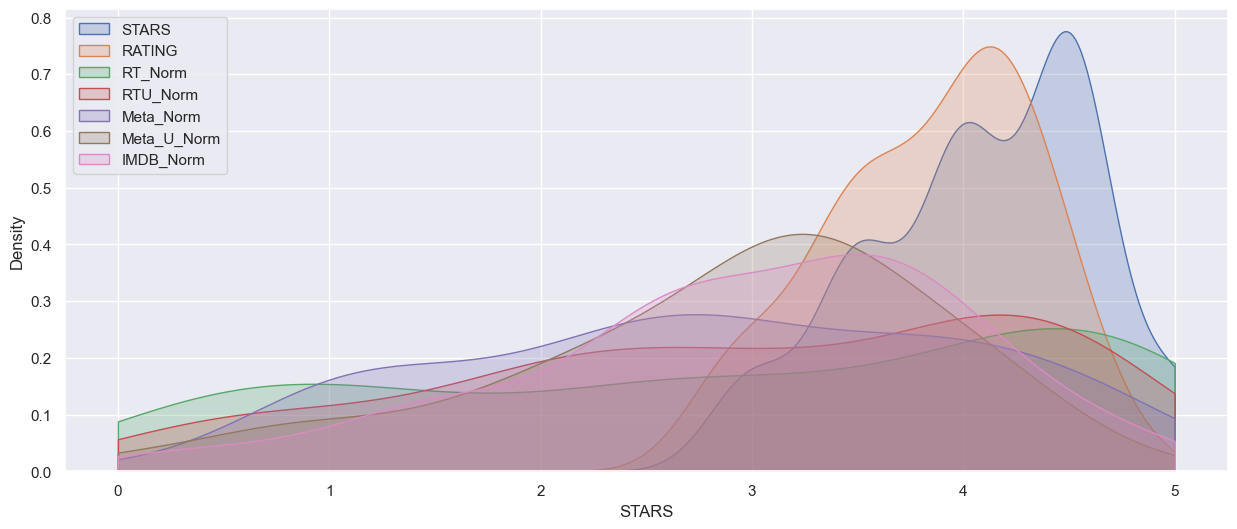

In [195]:
sns.kdeplot(data=norm_scores, x='STARS', shade=True, label='STARS', clip=(0,5))
sns.kdeplot(data=norm_scores, x='RATING', shade=True, label='RATING', clip=(0,5))
sns.kdeplot(data=norm_scores, x='RT_Norm', shade=True, label='RT_Norm', clip=(0,5))
sns.kdeplot(data=norm_scores, x='RTU_Norm', shade=True, label='RTU_Norm', clip=(0,5))
sns.kdeplot(data=norm_scores, x='Meta_Norm', shade=True, label='Meta_Norm', clip=(0,5))
sns.kdeplot(data=norm_scores, x='Meta_U_Norm', shade=True, label='Meta_U_Norm', clip=(0,5))
sns.kdeplot(data=norm_scores, x='IMDB_Norm', shade=True, label='IMDB_Norm', clip=(0,5))
plt.legend(loc='upper left')

**Мы сразу видим, что рейтинги Fandango очень сдвинуты справо. Интересно также, что рейтинги RT от критиков имеют очень пологое распределение. Давайте сравним только эти два распределения.** 

**Нарисуем график KDE plot, сравнивающий распределение рейтингов Rotten Tomatoes от критиков и распределение рейтингов STARS от Fandango.**

<AxesSubplot:xlabel='STARS', ylabel='Density'>

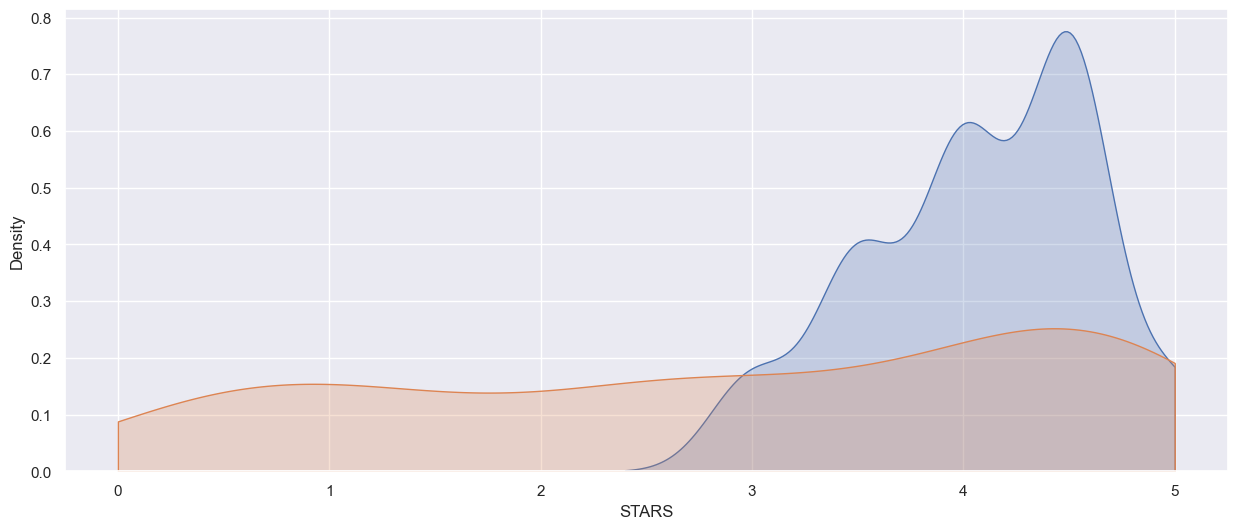

In [197]:
sns.kdeplot(data=norm_scores, x='STARS', shade=True, label='STARS', clip=(0,5))
sns.kdeplot(data=norm_scores, x='RT_Norm', shade=True, label='RT_Norm', clip=(0,5))

**Нарисуем график histplot, сравнивающий все нормализованные рейтинги.**

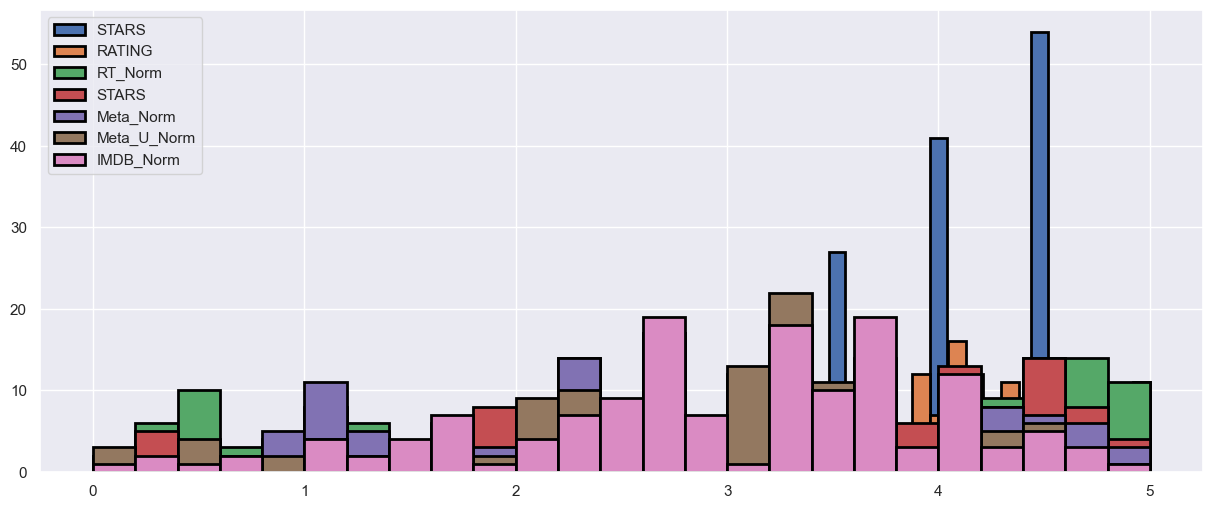

In [212]:
fig, ax = plt.subplots()
ax.hist(norm_scores.STARS, label='STARS', bins=25, edgecolor='black', lw=2 )
ax.hist(norm_scores.RATING, label='RATING', bins=25, edgecolor='black', lw=2  )
ax.hist(norm_scores.RT_Norm, label='RT_Norm', bins=25, edgecolor='black', lw=2  )
ax.hist(norm_scores.RTU_Norm, label='STARS', bins=25, edgecolor='black', lw=2  )
ax.hist(norm_scores.Meta_Norm, label='Meta_Norm', bins=25, edgecolor='black', lw=2  )
ax.hist(norm_scores.Meta_U_Norm, label='Meta_U_Norm', bins=25, edgecolor='black', lw=2 )
ax.hist(norm_scores.IMDB_Norm, label='IMDB_Norm', bins=25, edgecolor='black', lw=2 )
plt.legend(loc='upper left')


### Как различные компании оценивают фильмы с наименьшими рейтингами?

**Нарисуем график clustermap для всех нормализованных рейтингов. Обратим внимание на отличия в рейтингах между разными компаниями. Фильмы с высокими рейтингами должны попадать в одни кластеры, а фильмы с низкими рейтингами в другие кластеры.**

In [1]:
sns.clustermap(data=norm_scores,col_cluster=False )

NameError: name 'sns' is not defined

**Мы видели, что рейтинги Fandango явно выше рейтингов других компаний, особенно если смотреть на округлённые вверх значения рейтингов. Давайте посмотрим на 10 фильмов с наихудшими рейтингами по версии Rotten Tomatoes Critic - какие это 10 фильмов? Какие нормализованные рейтинги дали этим фильмам другие компании?**

In [216]:
norm_scores['FILM'] = united_table['FILM']
norm_scores.sort_values(by='RT_Norm')[:10]

E:\Anaconda\envs\My_Data_Sciense_Course\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.0,1.1,0.0,0.0,0.3,Paul Blart: Mall Cop 2 (2015)
84,4.0,3.9,0.1,2.0,0.9,0.6,2.1,Hitman: Agent 47 (2015)
25,4.5,4.1,0.2,1.8,0.8,1.5,2.3,Taken 3 (2015)
28,3.0,2.7,0.2,0.0,0.9,0.1,0.0,Fantastic Four (2015)
54,4.0,3.7,0.2,1.1,1.1,0.9,1.0,Hot Pursuit (2015)
50,4.0,3.6,0.3,1.0,1.0,2.2,0.7,The Boy Next Door (2015)
88,4.0,3.6,0.3,1.4,0.7,0.0,2.5,The Loft (2015)
87,3.5,3.2,0.3,0.5,1.2,1.0,1.5,Unfinished Business (2015)
109,3.0,2.9,0.4,0.1,1.5,2.1,0.7,The Vatican Tapes (2015)
83,3.5,3.3,0.4,0.9,1.1,1.8,1.6,Sinister 2 (2015)


**Визуализируем распределение рейтингов от всех компаний для 10 фильмов с наихудшими рейтингами.**

<AxesSubplot:xlabel='STARS', ylabel='Density'>

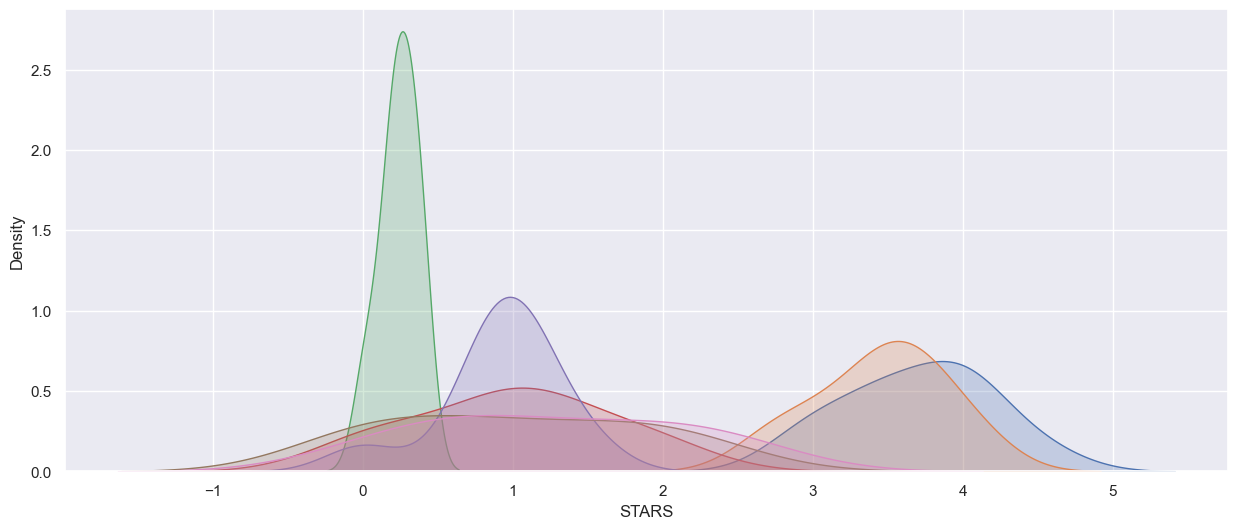

In [219]:
sns.kdeplot(data=norm_scores.sort_values(by='RT_Norm')[:10], x='STARS', shade=True)
sns.kdeplot(data=norm_scores.sort_values(by='RT_Norm')[:10], x='RATING', shade=True)
sns.kdeplot(data=norm_scores.sort_values(by='RT_Norm')[:10], x='RT_Norm', shade=True)
sns.kdeplot(data=norm_scores.sort_values(by='RT_Norm')[:10], x='RTU_Norm', shade=True)
sns.kdeplot(data=norm_scores.sort_values(by='RT_Norm')[:10], x='Meta_Norm', shade=True)
sns.kdeplot(data=norm_scores.sort_values(by='RT_Norm')[:10], x='Meta_U_Norm', shade=True)
sns.kdeplot(data=norm_scores.sort_values(by='RT_Norm')[:10], x='IMDB_Norm', shade=True)

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">
  
**Выводы: вот это да! Fandango показывал 3-4 звезды для фильмов, которые явно были неудачными!**  
    
**Больше всего отличается фильм [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0) - Fandango дал ему рейтинг 4.5 звёзд, хотя этот фильм получил [средний рейтинг 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) от других компаний!**

In [253]:
norm_films.iloc[25]

STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                   3
FILM           Taken 3 (2015)
Name: 25, dtype: object

In [254]:
0.4+2.3+1.3+2.3+3

9.3

In [255]:
9.3/5

1.86

----